In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
s=os.getcwd()

In [6]:
items = pd.read_csv(s+'/all/items.csv')
shops = pd.read_csv(s+'/all/shops.csv')
cats = pd.read_csv(s+'/all/item_categories.csv')
sales = pd.read_csv(s+'/all/sales_train.csv')
test = pd.read_csv(s+'/all/test.csv').set_index('ID')

In [8]:
train = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(cats, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [9]:
train.shape

(2935849, 10)

In [21]:
print(train.describe(include="all"))

              date  date_block_num    shop_id    item_id  item_price  \
count      2935847      2935847.00 2935847.00 2935847.00  2935847.00   
unique        1034             nan        nan        nan         nan   
top     28.12.2013             nan        nan        nan         nan   
freq          9434             nan        nan        nan         nan   
mean           NaN           14.57      33.00   10197.23      890.75   
std            NaN            9.42      16.23    6324.30     1720.49   
min            NaN            0.00       0.00       0.00        0.07   
25%            NaN            7.00      22.00    4476.00      249.00   
50%            NaN           14.00      31.00    9343.00      399.00   
75%            NaN           23.00      47.00   15684.00      999.00   
max            NaN           33.00      59.00   22169.00    59200.00   

        item_cnt_day                                          item_name  \
count     2935847.00                                        

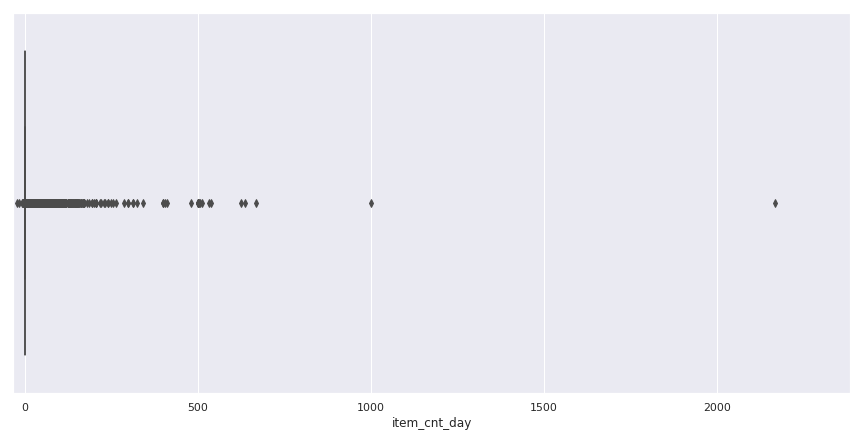

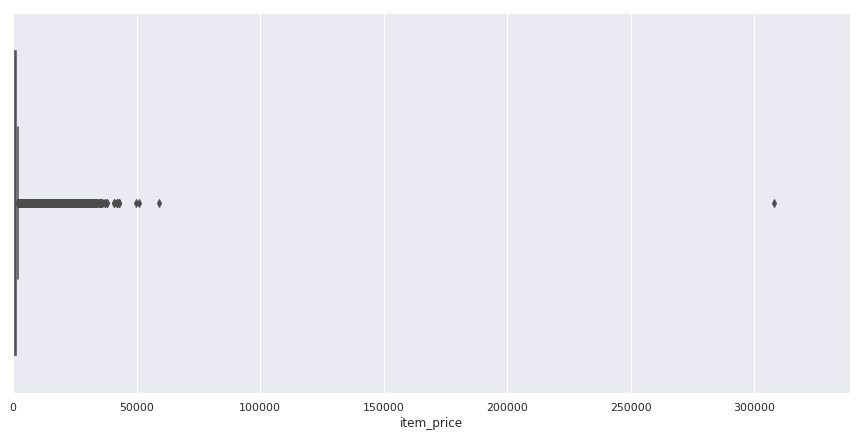

In [11]:
plt.figure(figsize=(15,7))
plt.xlim(train.item_cnt_day.min()*1.5, train.item_cnt_day.max()*1.1)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(15,7))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

In [12]:
median = train.item_price.median()
train.loc[train.item_price<0, 'item_price'] = median
train = train[train.item_price<100000]

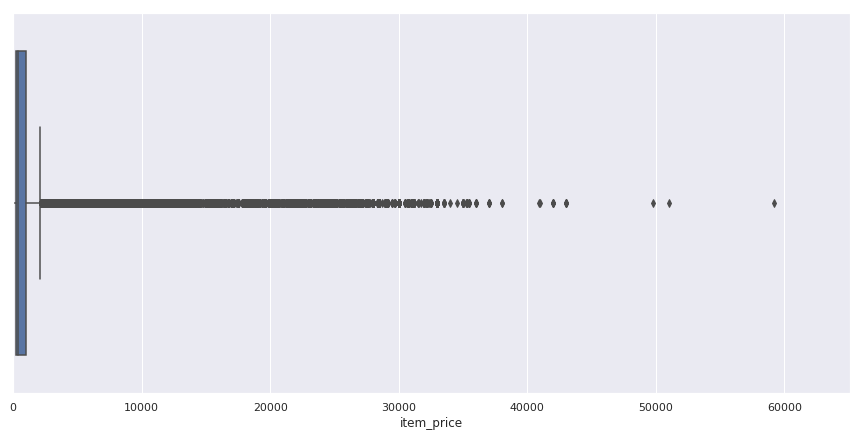

In [13]:
plt.figure(figsize=(15,7))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

In [15]:
train = train[train.item_cnt_day<1500]

In [16]:
test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()
lk_train = train[train['shop_id'].isin(test_shop_ids)]
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

In [19]:
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [20]:
train_monthly.shape
print(train_monthly.describe())

       date_block_num    shop_id  item_category_id    item_id  item_price  \
count      1224438.00 1224438.00        1224438.00 1224438.00  1224438.00   
mean            19.35      32.15             40.56    9614.86     1030.67   
std              9.11      16.47             18.61    6299.87     1827.38   
min              0.00       2.00              2.00      30.00        0.50   
25%             12.00      19.00             25.00    4181.00      299.00   
50%             21.00      31.00             38.00    7856.00      549.00   
75%             27.00      46.00             55.00   15229.00     1199.00   
max             33.00      59.00             83.00   22167.00    59200.00   

       item_cnt_day  
count    1224438.00  
mean           1.32  
std            2.67  
min          -16.00  
25%            1.00  
50%            1.00  
75%            1.00  
max         1000.00  
